ML2 : homework 07

Ladino Álvarez Ricardo Arturo.

2020-23-09

Parts of the notebook

Regression
  * Normalización
  * Extención de vectores
  * Descenso de gradiente
    * Hipótesis
    * Pérdida (Loss function)
    * Gradiente
    * Actualización en el descenso de gradiente:
  * Error
  * Gráfica


**NOTA:**

Se usa la base de datos: datasets_229906_491820_Fish.csv  que se descarga en: https://github.com/harika-bonthu/SupportVectorClassifier/blob/main/datasets_229906_491820_Fish.csv


Variables explicativas: Length1, Length2, Length3, Height, Width  

Variable predictiva: Weight

 - **Solución**:

 Code:

In [ ]:
## Librerias a usar
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error

---

### **Base de datos y selección inicial de clase a utilizar**

---

In [ ]:
## Base de datos inicial.
data = pd.read_csv("datasets_229906_491820_Fish.csv")
data.groupby("Species").sum()

,Weight,Length1,Length2,Length3,Height,Width
Species,,,,,,
Bream,21624.0,1060.7,1158.8,1342.4,531.4124,189.9665
Parkki,1703.0,206.0,223.8,250.7,98.5867,35.4281
Perch,21405.4,1441.2,1562.0,1656.0,440.2647,265.7605
Pike,12218.0,722.1,773.2,828.2,131.1341,86.4685
Roach,3041.0,412.9,445.5,499.4,133.8959,73.1570
Smelt,156.5,157.6,166.9,182.5,30.9312,18.7613
Whitefish,3186.0,172.8,187.9,205.9,60.1630,32.8383


In [ ]:
## Selección de especia a usar.
data_B = data.loc[data['Species'] == "Perch"]
#data_B= data_B.drop(['Species'], axis=1)
data_C = data_B.copy()
print ("Shape data  :", data_C.shape)
data_C.head(2)

Shape data  : (56, 7)


,Species,Weight,Length1,Length2,Length3,Height,Width
72,Perch,5.9,7.5,8.4,8.8,2.112,1.4080
73,Perch,32.0,12.5,13.7,14.7,3.528,1.9992


---

### **Se grafican todas las variables explicativas vs la variable de predicción**

---


<Figure size 432x288 with 0 Axes>

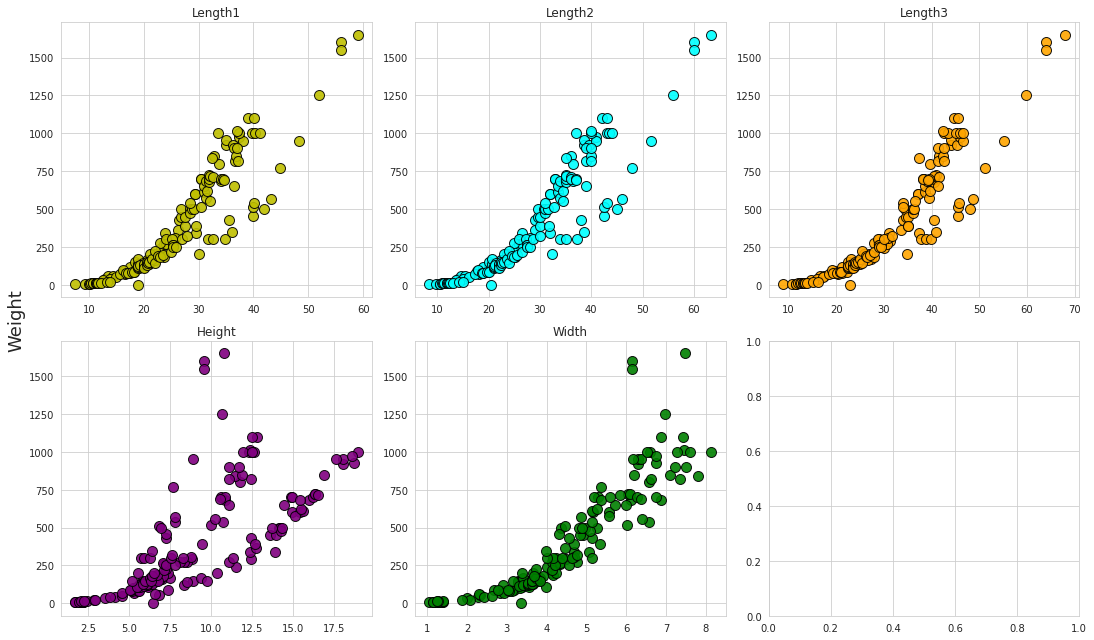

In [ ]:
## Graficas de variables.
plt.figure(1)
sns.set_style("whitegrid")
f, axarr = plt.subplots(2, 3, figsize=(15, 9))
Weigh = data.Weight.values

axarr[0, 0].scatter(data.Length1.values, Weigh,s = 100, color ='y', alpha = 0.9,edgecolor='black', linewidth=1 )
axarr[0, 0].set_title('Length1')

axarr[0, 1].scatter(data.Length2.values, Weigh, s = 100, color ='cyan', alpha = 0.9,edgecolor='black', linewidth=1)
axarr[0, 1].set_title('Length2')

axarr[0, 2].scatter(data.Length3.values, Weigh,s = 100, color ='orange', alpha = 0.9,edgecolor='black', linewidth=1)
axarr[0, 2].set_title('Length3')

axarr[1, 0].scatter(data.Height.values, Weigh,s = 100, color ='purple', alpha = 0.9,edgecolor='black', linewidth=1)
axarr[1, 0].set_title('Height')

axarr[1, 1].scatter(data.Width.values, Weigh, s = 100, color ='green', alpha = 0.9,edgecolor='black', linewidth=1)
axarr[1, 1].set_title('Width')


f.text(-0.01, 0.5, 'Weight', va='center', rotation='vertical', fontsize = 18)
plt.tight_layout()
plt.show()

---

### **Se define la matrix de caracteristicas y el vector de predicción**

### **Se normalizan los datos en la matriz de caracteristicas**

---


In [ ]:
#data_B= data_B.drop(['Species'], axis=1)
data_C = data_C.iloc[:,2:7].to_numpy()
Base = normalize(data_C, axis=0)
Base=np.around(Base, decimals=3)
print(f'\n Matriz dBase [Primeros 5 vectores] \n \n {Base[0:5]}')


 Matriz dBase [Primeros 5 vectores] 
 
 [[0.037 0.038 0.038 0.034 0.037]
 [0.062 0.063 0.063 0.056 0.053]
 [0.068 0.068 0.069 0.061 0.064]
 [0.074 0.074 0.074 0.073 0.069]
 [0.077 0.079 0.08  0.073 0.078]]


In [ ]:
X = Base.copy()
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)
X =np.around(X, decimals=3)
print(f'Shape Matriz X : {X.shape}')
print(f'\n Matriz de caracteristicas [Primeros 5 vectores de X] \n \n {X[0:5]}')

Shape Matriz X : (56, 6)

 Matriz de caracteristicas [Primeros 5 vectores de X] 
 
 [[1.    0.037 0.038 0.038 0.034 0.037]
 [1.    0.062 0.063 0.063 0.056 0.053]
 [1.    0.068 0.068 0.069 0.061 0.064]
 [1.    0.074 0.074 0.074 0.073 0.069]
 [1.    0.077 0.079 0.08  0.073 0.078]]


In [ ]:
y = data_B.iloc[:,1:2].to_numpy()
print(f'Shape Vector Y : {y.shape}')
## Observar la matriz original
print(f'\n Vector Y Original [Primeros 5 valores]\n{y[0:5]}')

Shape Vector Y : (56, 1)

 Vector Y Original [Primeros 5 valores]
[[ 5.9]
 [32. ]
 [40. ]
 [51.5]
 [70. ]]


---

### **Se extienden los vectores a términos cuadráticos**

---

In [ ]:
def x_ext(x, order):
    x_ex = [1]
    for c in x:
        for i in range(1, order + 1):
            x_ex.append(c**i)
    return np.array(x_ex)


def X_ext(X, order):
    X_ex = np.zeros((len(X), 1 + len(X[0]) * order))
    for i, x in enumerate(X):
        X_ex[i] = x_ext(x, order)
    return X_ex

In [ ]:
orden = 2
X_s = X_ext(X, orden)
X_s_1 = np.delete(X_s, [0], axis=1) ## Se usa
print(f'\n Matriz Original [Primeros 5 valores]\n{X[5]}')
print(f'\n Matriz Original extendida al cuadrado [Primeros 5 valores]\n{X_s_1[5]}\n \n') ### La matriz a usar.. X_s_1 !!!!
X_s.shape, X_s_1.shape


 Matriz Original [Primeros 5 valores]
[1.    0.08  0.082 0.083 0.083 0.088]

 Matriz Original extendida al cuadrado [Primeros 5 valores]
[1.       1.       0.08     0.0064   0.082    0.006724 0.083    0.006889
 0.083    0.006889 0.088    0.007744]
 



((56, 13), (56, 12))

---

### **Se genera el vector $\theta_{n+1}$ para descenso de gradiente**

---

In [ ]:
theta = np.zeros((X_s_1.shape[1], 1))
alpha = 0.05
theta.shape

(12, 1)

---

## **Se define la función de costo y se calcula el costo inicial**

$$ J(X,h_{\theta}) = \frac{1}{m}  \sum_{i=1}^{m} \left( \theta^{T}X^{i} - y^{i}\right)^{2}$$

---


In [ ]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

In [ ]:
inital_cost = cost_function(X_s_1, y, theta)
print("Costo inicial de la función:", inital_cost)

Costo inicial de la función: 132393.5630357143


**Como se observa el costo inicial es alto, lo que se busca ahora sera reducir el costo periodicamente usando el descenso de gradiente.**

---

### **Se define el descenso de gradiente**

**Parametros**

1. Hipótesis : $$ h_{\theta} (X^{i}) = \theta^{T} X$$

2. Pérdida (Loss F) : $$\left( h_{\theta} (X^{i}) - y^{i}\right)$$

3. Gradiente:  $$\left( h_{\theta} (X^{i}) - y^{i}\right) X_{j}^{i}$$

4. Actualización en el descenso de gradiente: $$\theta_{j} : = \theta_{j} - \alpha \frac{1}{m} \left( h_{\theta} (X^{i}) - y^{i}\right) X_{j}^{i}$$


---



In [ ]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)

    for iteration in range(iterations):
        h = X.dot(B)
        loss = h - Y
        gradient = X.T.dot(loss) / m
        B = B - alpha * gradient
        cost = cost_function(X, Y, B) ## Nuevo valor de coste
        cost_history[iteration] = cost

    return B, cost_history

---

### **Se buscan los valores de $\theta_{n+1}$**

In [ ]:
theta_B, cost_history = gradient_descent(X_s_1, y, theta, alpha, 10000000)

In [ ]:
print("Valores de 𝜃𝑛+1  :\n\n", theta_B)

Valores de 𝜃𝑛+1  :

 [[   63.03724062]
 [   63.03724062]
 [-2861.45491595]
 [ 7873.85529476]
 [-1455.23371745]
 [ 8283.8703002 ]
 [  976.03349191]
 [ 9023.45952381]
 [ -281.96970752]
 [11325.41307005]
 [ -754.21124212]
 [ 8844.07373539]]


In [ ]:
print("Forma de matriz  :",  X_s_1.shape)
print("Forma de coeficientes 𝜃𝑛+1  :",  theta_B.shape)

Forma de matriz  : (56, 12)
Forma de coeficientes 𝜃𝑛+1  : (12, 1)


---

### **Se calcula el RMSE y $R^2$ para el descenso de gradiente**

---


In [ ]:
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2


In [ ]:
Y_pred = X_s_1.dot(theta_B)
print(" Valor del error cuadrático medio:  ", rmse(y, Y_pred))
print("\n Valor del coeficiente de determinación:   ", r2_score(y, Y_pred))

 Valor del error cuadrático medio:   [36.88257551]

 Valor del coeficiente de determinación:    [0.9885379]


---

### **Se calcula el mínimo real**

$$ w = (X^{T}X)^{-1} X^{T} y $$

---

In [ ]:
w = np.linalg.pinv(X_s_1.T.dot(X_s_1)).dot((X_s_1.T.dot(y)))
print("Valores de w  :\n\n", w)

Valores de w  :

 [[ 6.27896153e+01]
 [ 6.27897593e+01]
 [ 1.00479637e+04]
 [-5.08810674e+04]
 [ 3.37645407e+03]
 [-1.50530069e+04]
 [-1.45651606e+04]
 [ 8.34688781e+04]
 [-3.59421321e+03]
 [ 2.33414208e+04]
 [ 3.43170311e+02]
 [ 4.66791884e+03]]


---

### **Se calcula el RMSE y $R^2$ para el mínimo real**

---

In [ ]:
Y_pd = X_s_1.dot(w)
print(" Valor del error cuadrático medio:  ", rmse(y, Y_pd))
print("\n Valor del coeficiente de determinación:   ", r2_score(y, Y_pd))

 Valor del error cuadrático medio:   [35.4794124]

 Valor del coeficiente de determinación:    [0.98939344]


---

### **Diferencias entre valores de coeficientes $\theta_{n+1}$ y $w$**

In [ ]:
print("Diferencia   𝜃𝑛+1 , w :", np.linalg.norm(w-theta_B))

Diferencia   𝜃𝑛+1 , w : 100719.4025084593


---

### **Gráfica de resultados**



$$ \hat{y}_{Weight}=  \theta_{0} + \theta_{0}^{2} + \theta_{1} Length1 + \theta_{1}^{2} Length1 + \theta_{2} Length2 + \theta_{2}^{2} Length2 + \theta_{3} Length3 + \theta_{3}^{2} Length3 + \theta_{4} Height + \theta_{4}^{2}Height + \theta_{5} Width + \theta_{5}^{2} Width$$

---



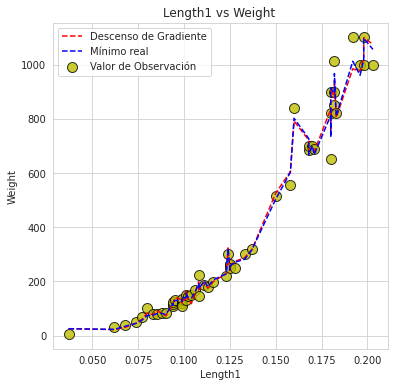

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(X_s_1[:, 2], y, s = 100, color ='y', alpha = 0.8,edgecolor='black', linewidth=1, label='Valor de Observación')
plt.plot(X_s_1[:, 2], np.matmul(X_s_1, theta_B), "--r", label='Descenso de Gradiente')
plt.plot(X_s_1[:, 2], np.matmul(X_s_1, w), "--b", label='Mínimo real')
plt.title('Length1 vs Weight ')
plt.xlabel('Length1')
plt.ylabel('Weight')
plt.legend()
plt.show()

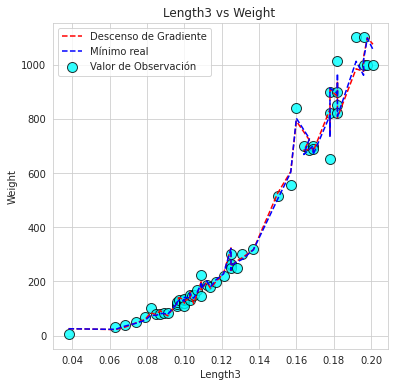

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(X_s_1[:, 4], y, s = 100, color ='cyan', alpha = 0.8,edgecolor='black', linewidth=1, label='Valor de Observación')
plt.plot(X_s_1[:, 4], np.matmul(X_s_1, theta_B), "--r", label='Descenso de Gradiente')
plt.plot(X_s_1[:, 4], np.matmul(X_s_1, w), "--b", label='Mínimo real')
plt.title('Length3 vs Weight ')
plt.xlabel('Length3')
plt.ylabel('Weight')
plt.legend()
plt.show()

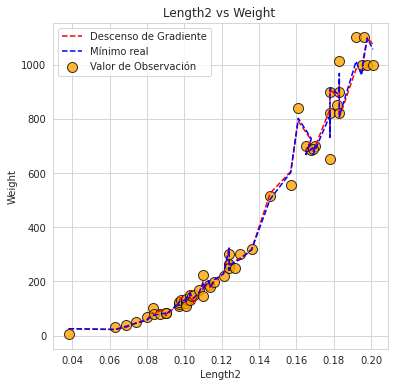

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(X_s_1[:, 6], y, s = 100, color ='orange', alpha = 0.8,edgecolor='black', linewidth=1, label='Valor de Observación')
plt.plot(X_s_1[:, 6], np.matmul(X_s_1, theta_B), "--r", label='Descenso de Gradiente')
plt.plot(X_s_1[:, 6], np.matmul(X_s_1, w), "--b", label='Mínimo real')
plt.title('Length2 vs Weight ')
plt.xlabel('Length2')
plt.ylabel('Weight')
plt.legend()
plt.show()

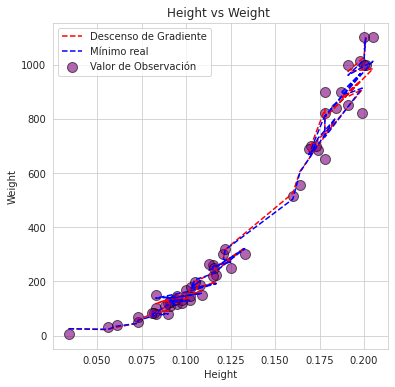

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(X_s_1[:, 8], y, s = 100, color ='purple', alpha = 0.6,edgecolor='black', linewidth=1, label='Valor de Observación')
plt.plot(X_s_1[:, 8], np.matmul(X_s_1, theta_B), "--r", label='Descenso de Gradiente')
plt.plot(X_s_1[:, 8], np.matmul(X_s_1, w), "--b", label='Mínimo real')
plt.title('Height vs Weight ')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show()

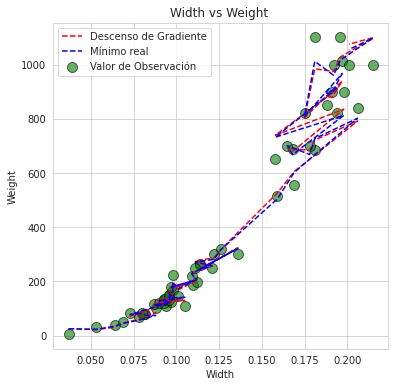

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(X_s_1[:, 10], y, s = 100, color ='green', alpha = 0.6,edgecolor='black', linewidth=1, label='Valor de Observación')
plt.plot(X_s_1[:, 10], np.matmul(X_s_1, theta_B), "--r", label='Descenso de Gradiente')
plt.plot(X_s_1[:, 10], np.matmul(X_s_1, w), "--b", label='Mínimo real')
plt.title('Width vs Weight ')
plt.xlabel('Width')
plt.ylabel('Weight')
plt.legend()
plt.show()
